# YOLO

In [4]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import torch
import torch
from IPython.display import Image, clear_output  # to display images
import requests
from PIL import Image

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # You can choose 'yolov5m', 'yolov5l', or 'yolov5x' for larger models

!pip install torch torchvision torchaudio
!pip install matplotlib
#!pip install opencv-python-headless # sometimes 'opencv-python' does not work properly in Google Colab environments

!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-3 Python-3.10.12 torch-2.1.0+cu118 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 99.4MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Cloning into 'yolov5'...
remote: Enumerating objects: 16048, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 16048 (delta 45), reused 44 (delta 25), pack-reused 15967
Receiving objects: 100% (16048/16048), 14.61 MiB | 14.64 MiB/s, done.
Resolving deltas: 100% (11011/11011), done.
/content/yolov5/yolov5


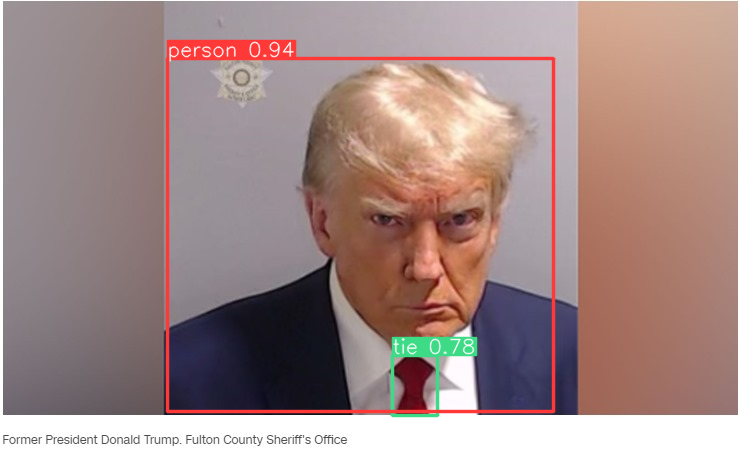

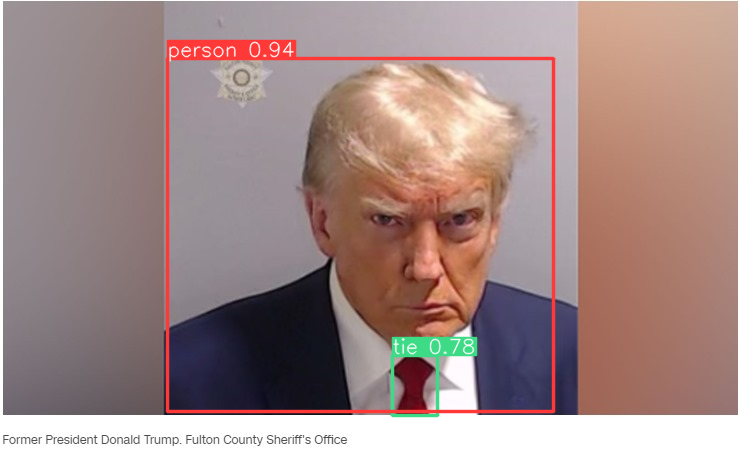

Bounding box 1: [     167.38      58.541       553.7      411.06     0.93555           0]
Confidence score: 0.9355528950691223
Class ID: 0.0
Bounding box 2: [     392.69      355.64      437.45      415.04      0.7817          27]
Confidence score: 0.7817042469978333
Class ID: 27.0
         xmin        ymin        xmax        ymax  confidence  class    name
0  167.375702   58.540775  553.696960  411.062500    0.935553      0  person
1  392.692474  355.635406  437.451324  415.043915    0.781704     27     tie


In [5]:
# Let's assume you uploaded an image to your Colab session named 'image.jpg'
img_path = '/content/trump.jpeg'  # Change this to the path of your uploaded image

# Use the model to perform inference on the image
results = model(img_path)

# Results contain bounding boxes and labels for detections
# You can visualize the results using the 'show' method
results.show()

# Download an image from the web
img_url = 'http://images.cocodataset.org/val2017/000000039769.jpg'  # Replace with your image URL
img_data = requests.get(img_url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)

# Now you have the image saved as 'image.jpg', you can process it with the YOLO model
results = model('/content/trump.jpeg')
results.show()


# Results are in the 'results.xyxy[0]' tensor if you want to get bounding box coordinates
for i in range(len(results.xyxy[0])):
    print(f"Bounding box {i+1}: {results.xyxy[0][i].numpy()}")
    print(f"Confidence score: {results.xyxy[0][i][4].item()}")
    print(f"Class ID: {results.xyxy[0][i][5].item()}")

# You can also print the results as a pandas DataFrame
print(results.pandas().xyxy[0])